In [1]:
import os
os.chdir("../")
from algoritmo_genetico.pos import *
os.chdir("journal")
from plotly import express as px
import matplotlib
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import seaborn as sns
import math
from networkx.algorithms import approximation, assortativity,centrality, cluster, distance_measures, link_analysis, smallworld
from networkx.classes import function
from networkx.algorithms.community.quality import modularity
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
def hausdorff_normalized(p,q):
    T=q.shape[1]
    from scipy.spatial.distance import directed_hausdorff
    return max(directed_hausdorff(p,q)[0],directed_hausdorff(q,p)[0])/np.sqrt(T)

In [2]:
grupos = {'A':'Immune','B':'Susceptible','C':'Highly Susceptible'}

Homofilia 0.9527272727272728
------------------------------
Asortatividad 0.9290329624519856
------------------------------
Porcentaje comunicación
[[0.33818182 0.01090909 0.00181818]
 [0.01090909 0.30909091 0.01090909]
 [0.00181818 0.01090909 0.30545455]]
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 275
Average degree:   5.5000
average clustering coefficient of G: 0.164
Densidad de G: 0.05555555555555555
degree assortativity:-0.11704983812662721
Coeficiente de agrupamiento de G:0.15793217893217887
Diametro de G:7
Modularity of G:0.6188495867768671


/home/cpulido/anaconda3/envs/pos/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


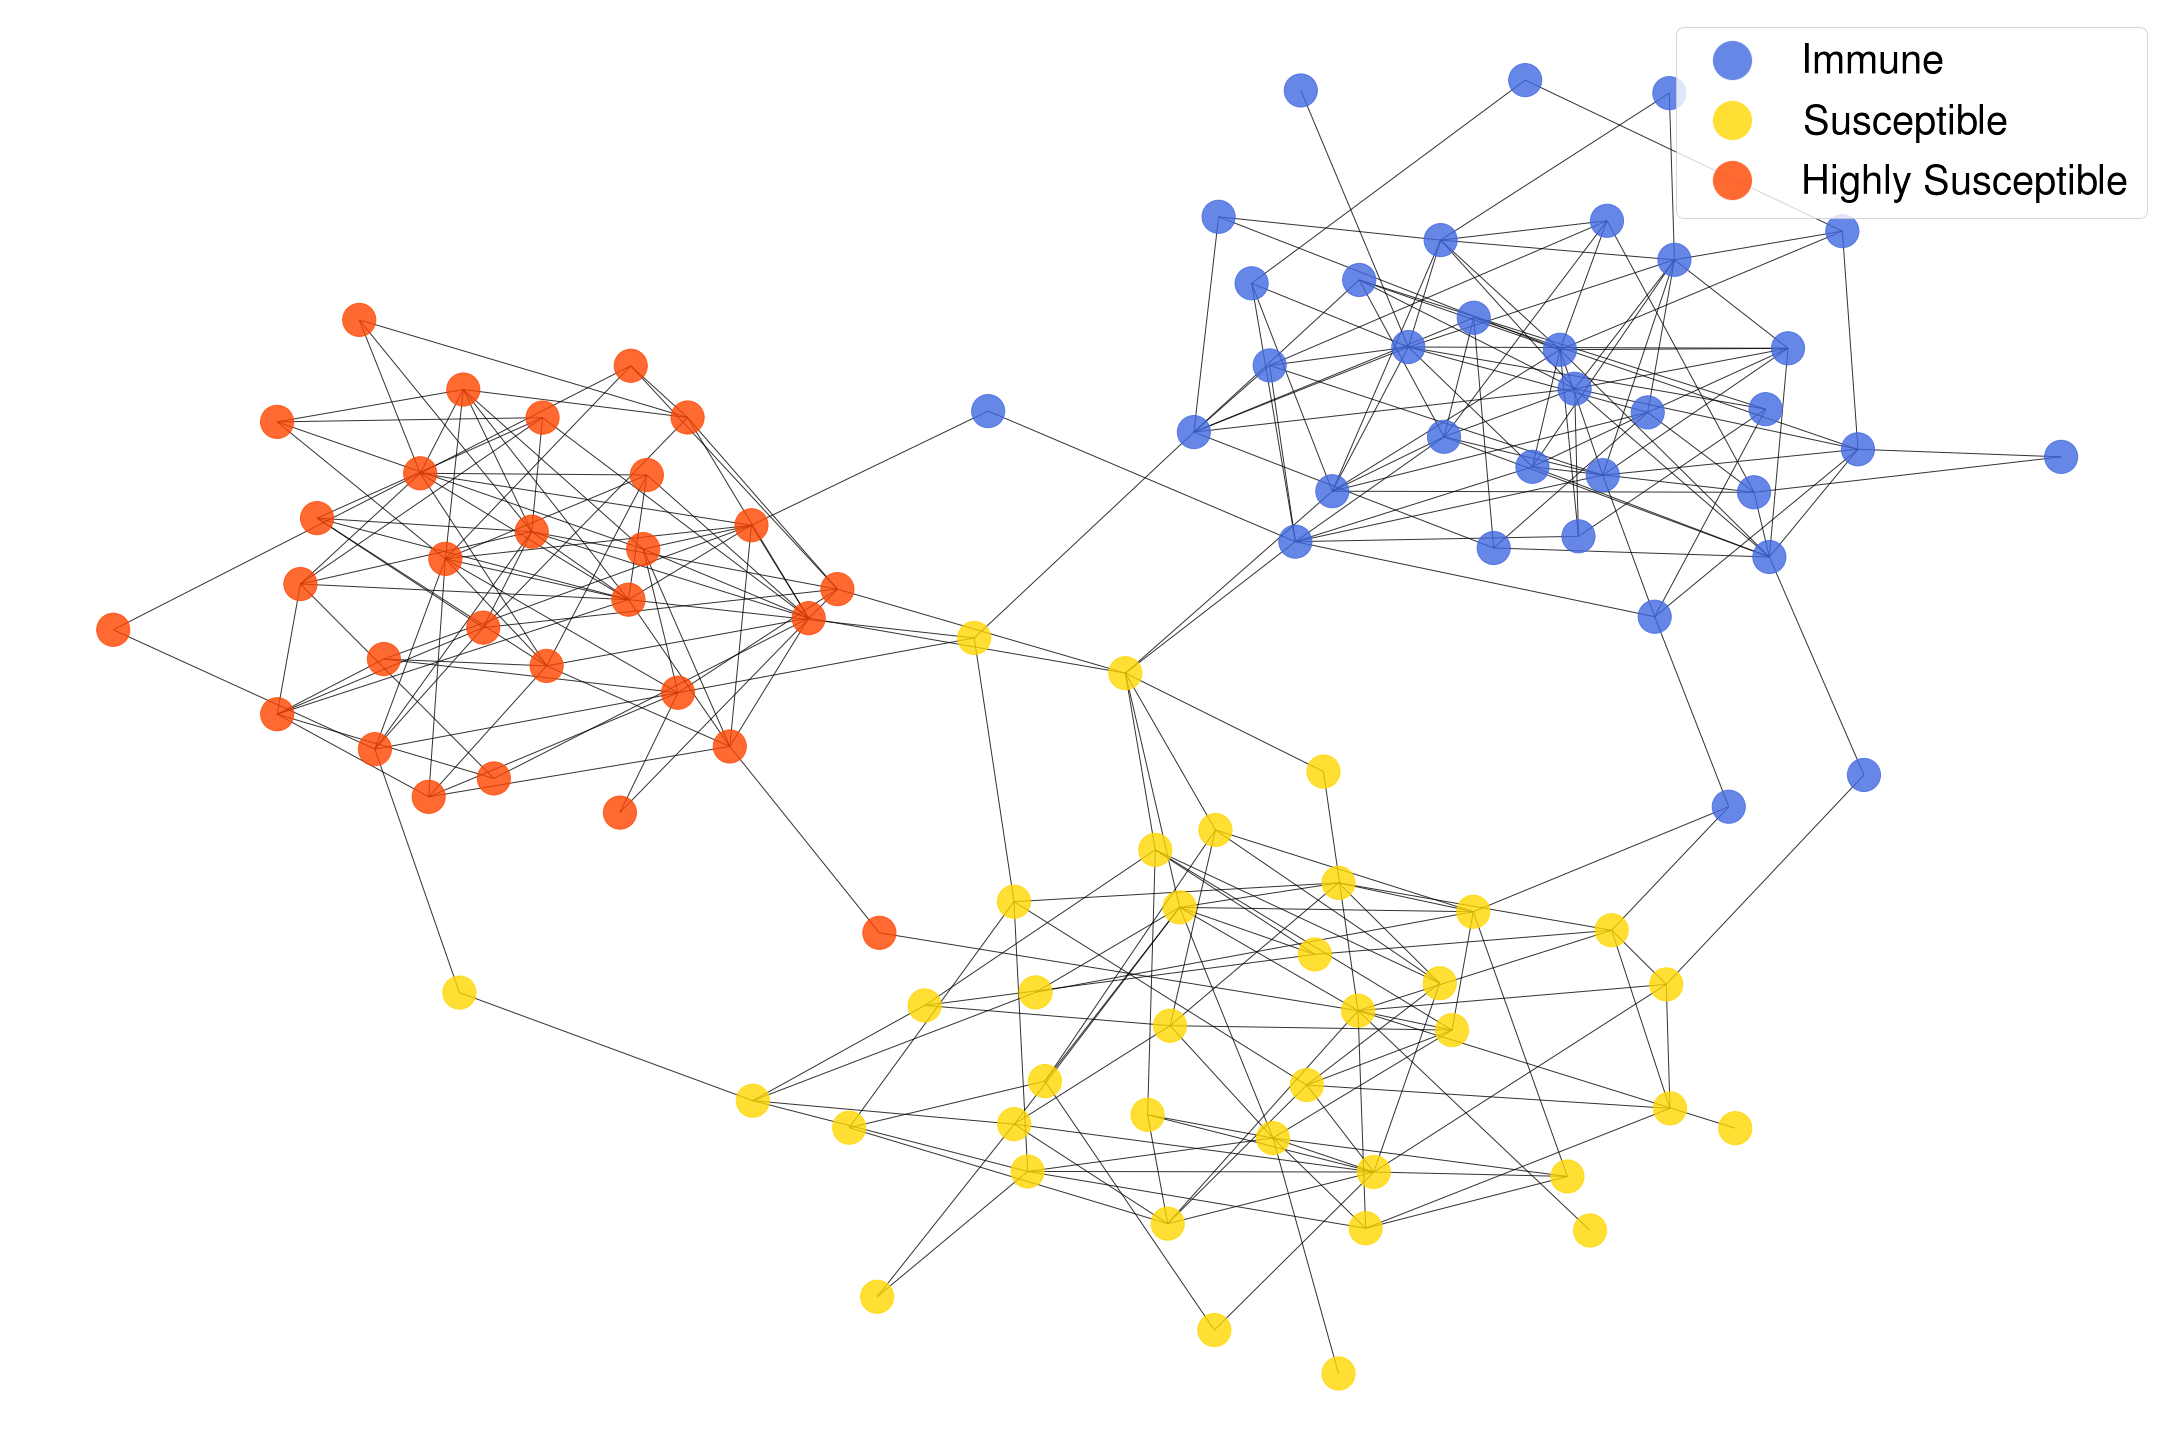

In [4]:
# vertices con estructura de comunidad
vertices,edges=read("poor2.graph")
grado_grupo =np.array([[len(vertice[2:]),grupos[vertice[1]]] for vertice in vertices])            
V=pd.DataFrame(grado_grupo,columns=['Grade','Group']).astype({'Grade': 'int64'})
G=convert_vertices_to_graph(vertices,edges)

print("Homofilia",homofilia(G))
print("-"*30)
print("Asortatividad",assor(G))
print("-"*30)
print("Porcentaje comunicación")
print(mixing_matrix(G))
print(function.info(G))
print("average clustering coefficient of G: "+str(approximation.average_clustering(G)))
print("Densidad de G: "+str(function.density(G)))
print("degree assortativity:"+str(assortativity.degree_assortativity_coefficient(G)))
print("Coeficiente de agrupamiento de G:"+str(cluster.average_clustering(G)))
print("Diametro de G:"+str(distance_measures.diameter(G)))
#print("Coeficiente de Small World: " + str(smallworld.sigma(G))) #A graph is commonly classified as small-world if sigma>1.
comm=[]
for g in grupos.values():
    comm.append({i for i in V[V.Group == g].index})
print("Modularity of G:"+str(modularity(G,comm)))
draw_graph(G,np.ones(len(vertices)),legends=grupos,save=True,file="graficas/poor.pdf")

Homofilia 0.8148148148148148
------------------------------
Asortatividad 0.7147347740667976
------------------------------
Porcentaje comunicación
[[0.35690236 0.03535354 0.04713805]
 [0.03535354 0.25252525 0.01010101]
 [0.04713805 0.01010101 0.20538721]]
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 297
Average degree:   5.9400
average clustering coefficient of G: 0.189
Densidad de G: 0.06
degree assortativity:-0.14268364475800646
Coeficiente de agrupamiento de G:0.17755557775557776
Diametro de G:7
Modularity of G:0.4639832670135664


/home/cpulido/anaconda3/envs/pos/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



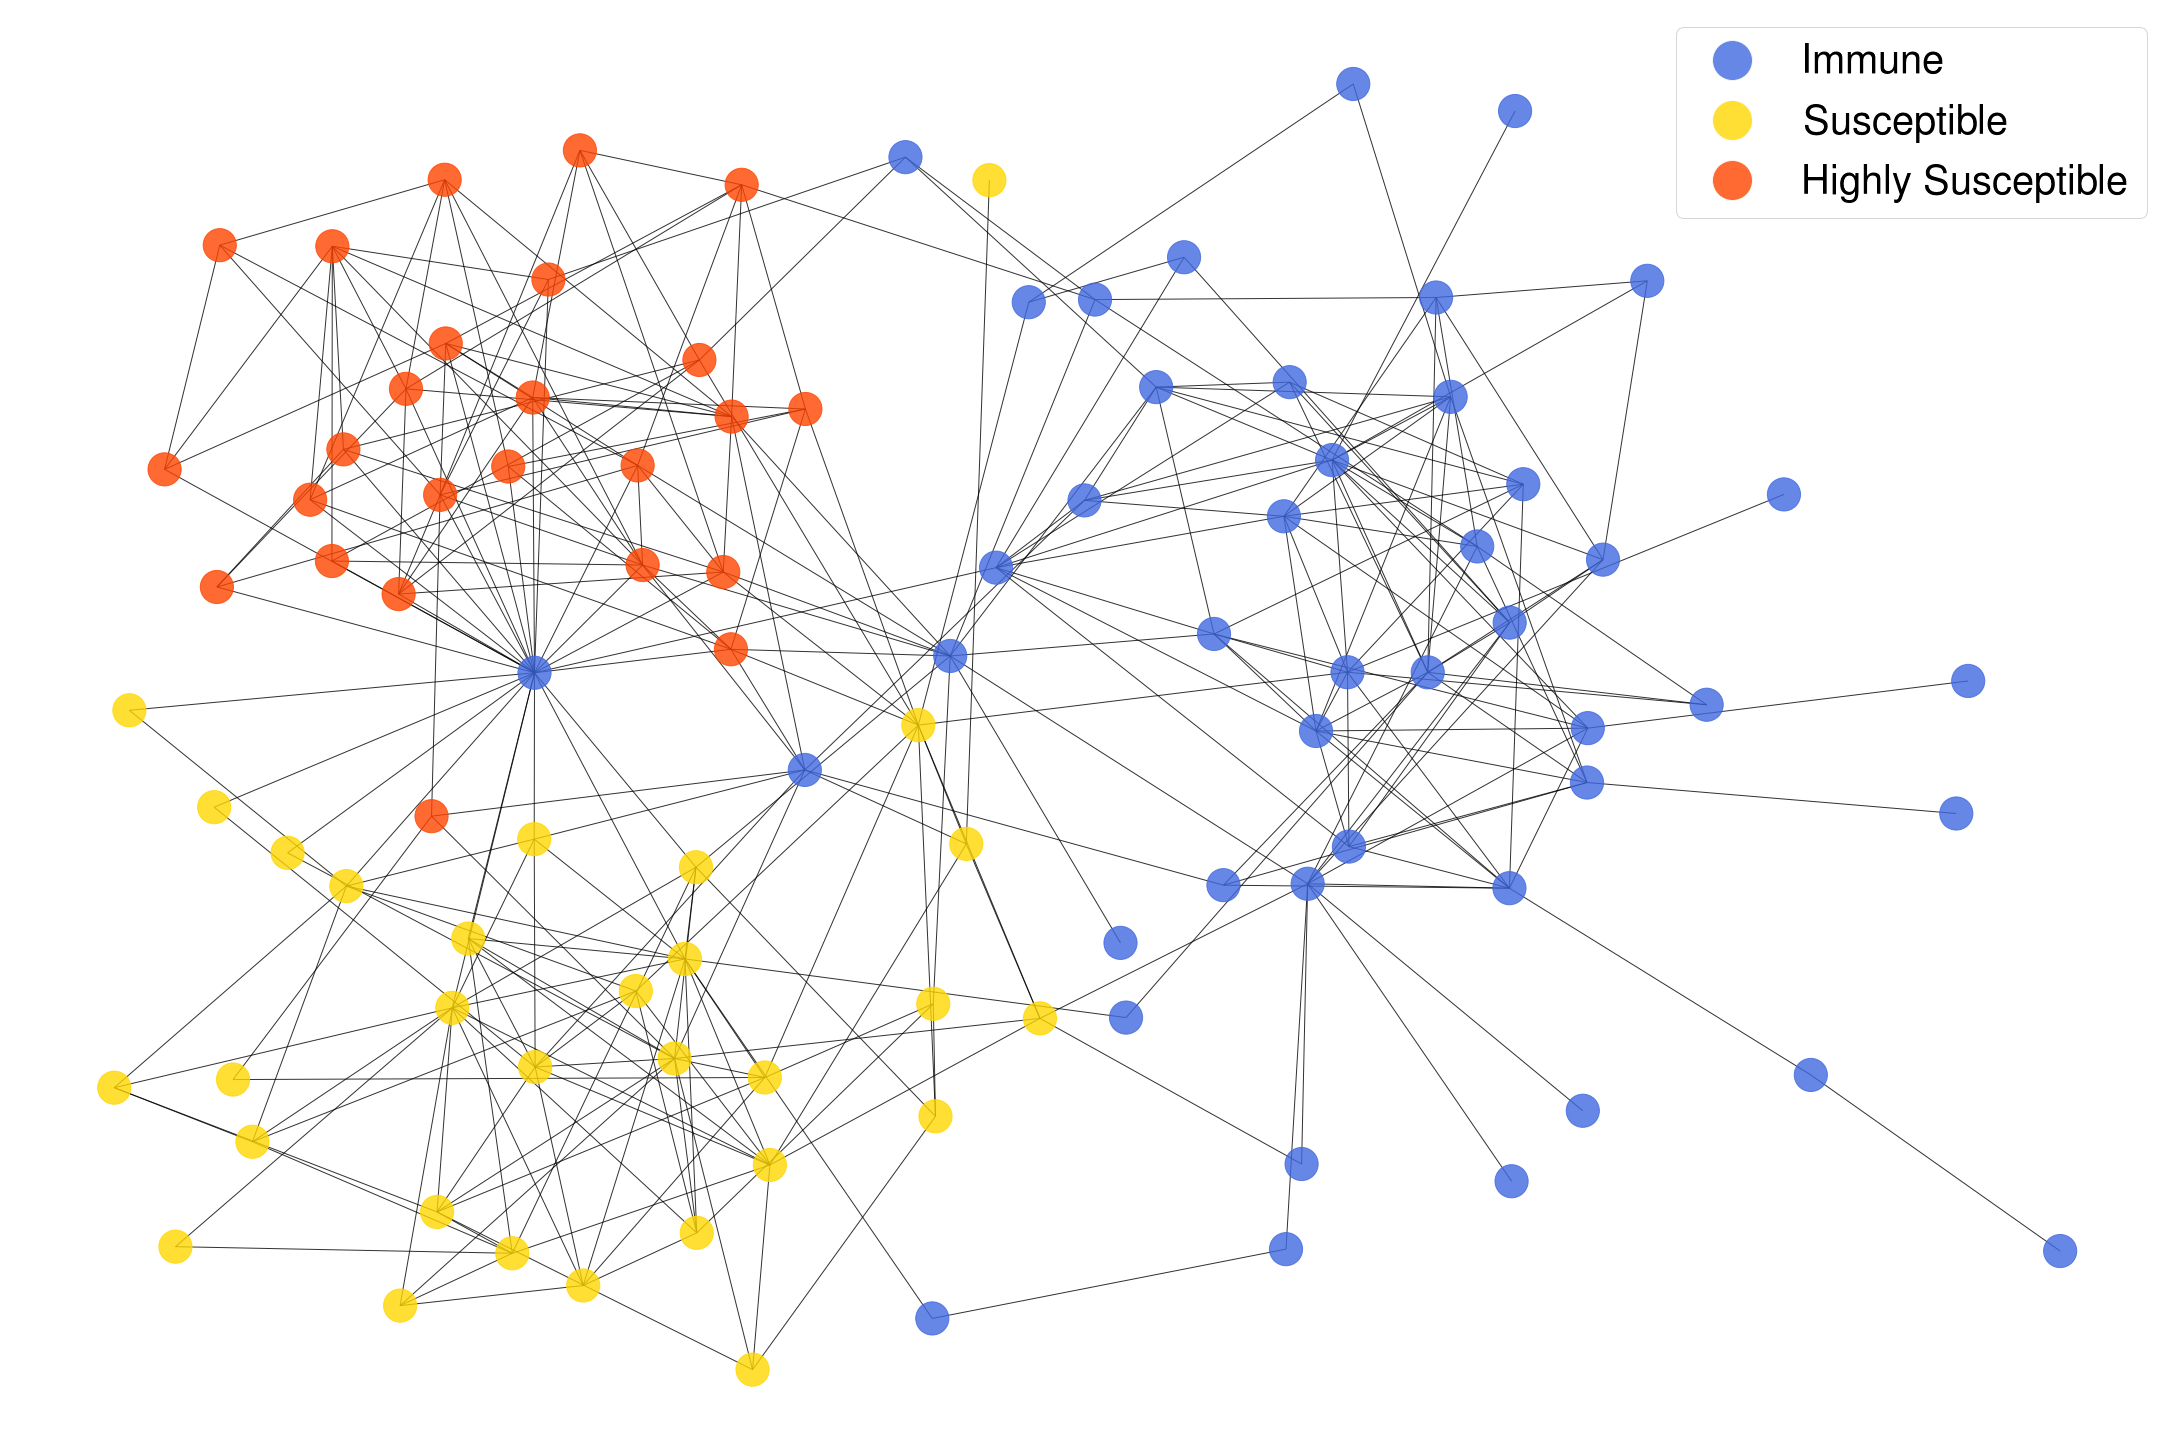

In [6]:
# vertices con estructura de comunidad
vertices,edges=read("medium2.graph")
grado_grupo =np.array([[len(vertice[2:]),grupos[vertice[1]]] for vertice in vertices])            
V=pd.DataFrame(grado_grupo,columns=['Grade','Group']).astype({'Grade': 'int64'})
G=convert_vertices_to_graph(vertices,edges)

print("Homofilia",homofilia(G))
print("-"*30)
print("Asortatividad",assor(G))
print("-"*30)
print("Porcentaje comunicación")
print(mixing_matrix(G))
print(function.info(G))
print("average clustering coefficient of G: "+str(approximation.average_clustering(G)))
print("Densidad de G: "+str(function.density(G)))
print("degree assortativity:"+str(assortativity.degree_assortativity_coefficient(G)))
print("Coeficiente de agrupamiento de G:"+str(cluster.average_clustering(G)))
print("Diametro de G:"+str(distance_measures.diameter(G)))
#print("Coeficiente de Small World: " + str(smallworld.sigma(G))) #A graph is commonly classified as small-world if sigma>1.
comm=[]
for g in grupos.values():
    comm.append({i for i in V[V.Group == g].index})
print("Modularity of G:"+str(modularity(G,comm)))
draw_graph(G,np.ones(len(vertices)),legends=grupos,save=True,file="graficas/medium.pdf")

Homofilia 0.6099476439790575
------------------------------
Asortatividad 0.40108696224042584
------------------------------
Porcentaje comunicación
[[0.14136126 0.10209424 0.03534031]
 [0.10209424 0.27486911 0.05759162]
 [0.03534031 0.05759162 0.19371728]]
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 382
Average degree:   7.6400
average clustering coefficient of G: 0.257
Densidad de G: 0.07717171717171717
degree assortativity:-0.1492649695287384
Coeficiente de agrupamiento de G:0.24668719811265505
Diametro de G:5
Modularity of G:0.26121474192044913


/home/cpulido/anaconda3/envs/pos/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



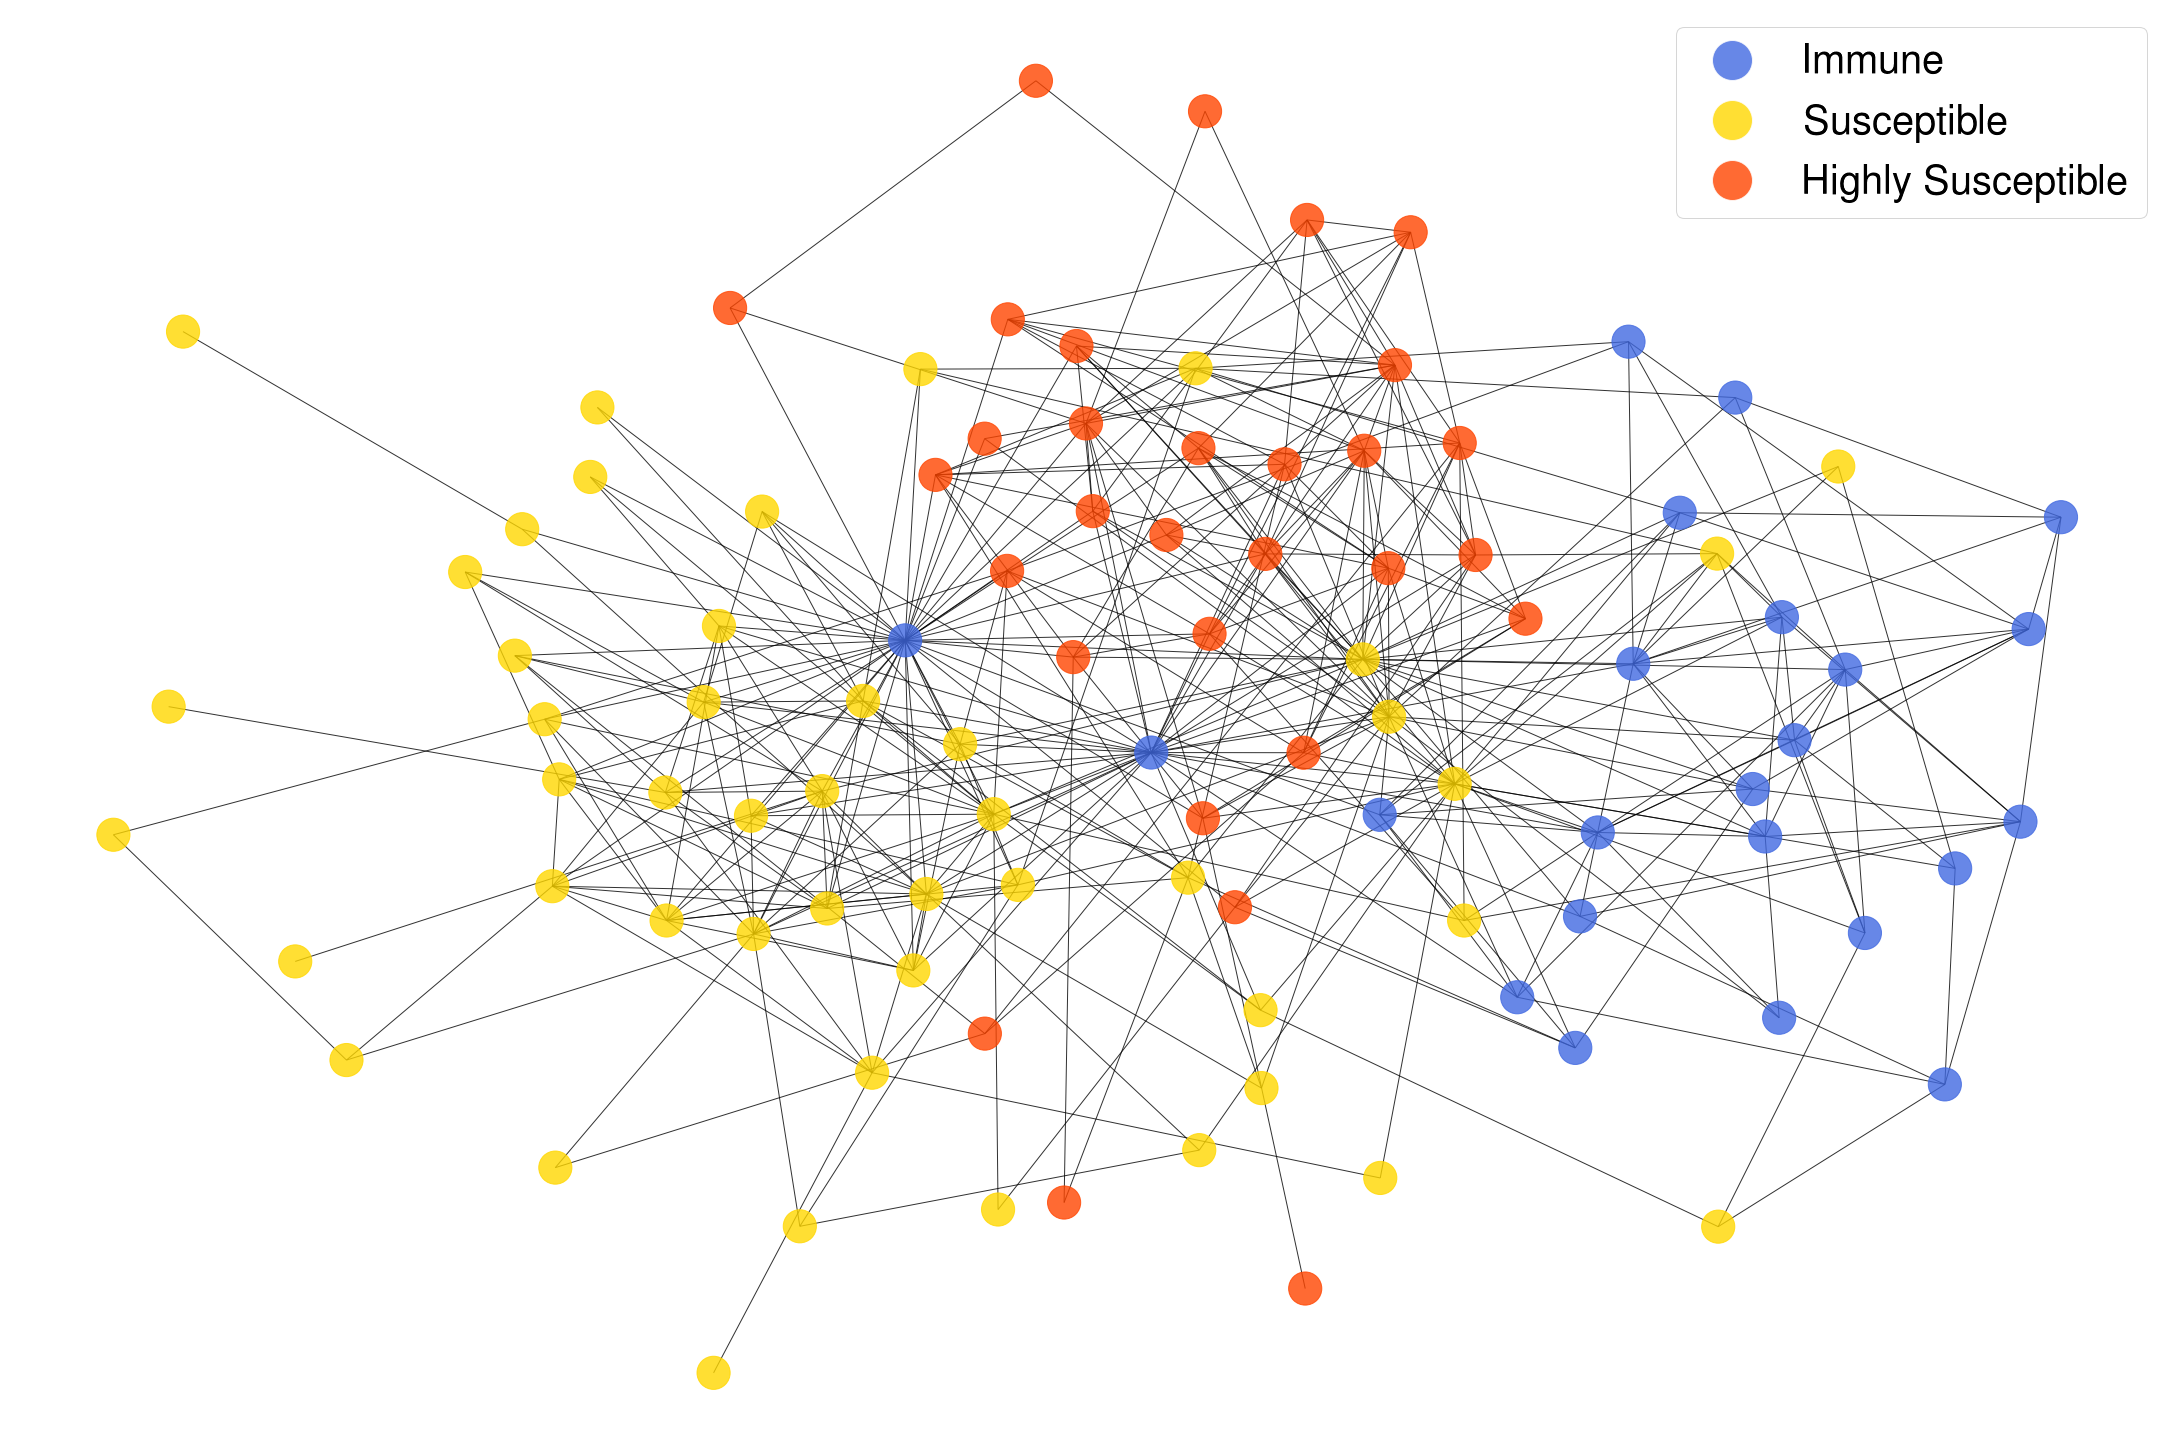

In [7]:
# vertices con estructura de comunidad
vertices,edges=read("high2.graph")
grado_grupo =np.array([[len(vertice[2:]),grupos[vertice[1]]] for vertice in vertices])            
V=pd.DataFrame(grado_grupo,columns=['Grade','Group']).astype({'Grade': 'int64'})
G=convert_vertices_to_graph(vertices,edges)

print("Homofilia",homofilia(G))
print("-"*30)
print("Asortatividad",assor(G))
print("-"*30)
print("Porcentaje comunicación")
print(mixing_matrix(G))
print(function.info(G))
print("average clustering coefficient of G: "+str(approximation.average_clustering(G)))
print("Densidad de G: "+str(function.density(G)))
print("degree assortativity:"+str(assortativity.degree_assortativity_coefficient(G)))
print("Coeficiente de agrupamiento de G:"+str(cluster.average_clustering(G)))
print("Diametro de G:"+str(distance_measures.diameter(G)))
#print("Coeficiente de Small World: " + str(smallworld.sigma(G))) #A graph is commonly classified as small-world if sigma>1.
comm=[]
for g in grupos.values():
    comm.append({i for i in V[V.Group == g].index})
print("Modularity of G:"+str(modularity(G,comm)))
draw_graph(G,np.ones(len(vertices)),legends=grupos,save=True,file="graficas/highly.pdf")

In [8]:
# parametros modelo
modelo='g_m_v'
T=300
psi=0.98
nu=0.8
mu=0.14
lamda={'A':0,'B':0.005,'C':0.05}

In [9]:
s0=np.random.rand(len(vertices))

In [11]:
from itertools import combinations
comb=list(combinations(grupos,2))
modelo='g_m_v'
Distances=[]
files=["poor2.graph",'medium2.graph','high2.graph']
names=["Poor Connected",'Medium Connected','Highly Connected']
for i in range(3):
    vertices,edges=read(files[i])
    grado_grupo=np.array([[len(vertice[2:]),grupos[vertice[1]]] for vertice in vertices])            
    V=pd.DataFrame(grado_grupo,columns=['Grade','Group']).astype({'Grade': 'int64'})
    S=generate(vertices,psi=psi,
           nu=nu,mu=mu,T=T,
           s=s0,lamda=lamda,modelo=modelo)[0].T
    
    for c in comb:
        Distances.append([hausdorff_normalized(S[V.Group == grupos[c[0]]],
                                              S[V.Group == grupos[c[1]]]),
                         grupos[c[0]]+"-"+grupos[c[1]],names[i]]
                        )
modelo='random'   
S=generate(vertices,psi=psi,
           nu=nu,mu=mu,T=T,
           s=s0,lamda=lamda,modelo=modelo)[0].T
for c in comb:
        Distances.append([hausdorff_normalized(S[V.Group == grupos[c[0]]],
                                              S[V.Group == grupos[c[1]]]),
                         grupos[c[0]]+"-"+grupos[c[1]],'Random']
                        )
Distances=pd.DataFrame(Distances,columns=['Hausdorff Distance','Combination','Graph Type'])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


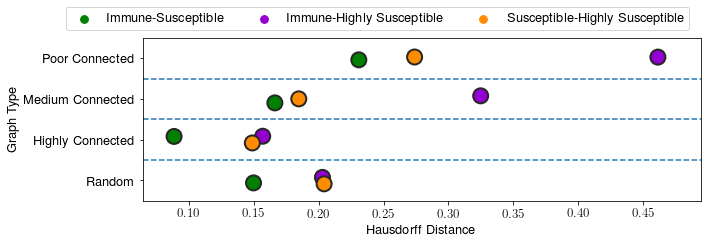

In [12]:
font = {'size'   : 13}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,3))
sns.stripplot(x="Hausdorff Distance", hue="Combination", y="Graph Type",
              data=Distances, size=15,linewidth=2,palette=['green','darkviolet','darkorange'])
plt.axhline(0.5, ls='--')
plt.axhline(1.5, ls='--')
plt.axhline(2.5, ls='--')
plt.legend(loc='upper left',ncol=4,bbox_to_anchor=(-0.15,1.23))
plt.savefig("graficas/distance_graphs.pdf", bbox_inches = "tight")
plt.show()